#SURVIVAL PREDICTION

🙋‍♀️ Author : Sonia firdous

📧 Email: soniafirdous1985@gmail.com

🔗 Data Source :

The data was collected from the following [LINK](https://www.kaggle.com/competitions/titanic/data)

📜 Description:

The Titanic dataset is split into two parts:

Training Set (train.csv)

Contains passenger information along with the outcome (Survived).

Used to train and build machine learning models.

Features include demographic and travel-related attributes such as gender, age, class, and others.

Feature engineering can be applied to create additional useful features (e.g., FamilySize, IsAlone).

Test Set (test.csv)

Contains passenger information without the survival outcome.

Used to evaluate how well the trained model performs on unseen data.

The goal is to predict the survival status of each passenger based on the trained model.

🔍 Purpose of Analysis:

The goal of this analysis is to predict passenger survival on the Titanic using machine learning. By exploring the training data and applying feature engineering, we aim to build models that accurately classify survival and identify the key factors that influenced it.


#IMPORT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [4]:
df=pd.read_csv("/content/train (1).csv")


# DATA EXPLORATION

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#DATA CLEANING

In [9]:
missing=df.isnull().sum()
print(missing)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
missing_percent=df.isnull().sum()/df.shape[0]*100
print(missing_percent)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [11]:
missing_greater_than_20=missing_percent[missing_percent>15]
print(missing_greater_than_20)

Age      19.865320
Cabin    77.104377
dtype: float64


In [12]:
df["Age"].fillna(df["Age"].median(), inplace=True)


/tmp/ipython-input-1567474574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [13]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)



/tmp/ipython-input-2829999149.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [14]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


change data types

In [15]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")
df["Sex"] = df["Sex"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")
df["Age"]=df["Age"].astype("int64")

#VISUALIZE DATA

In [16]:
sns.set_style("whitegrid")     # clean grid background
sns.set_palette("Set2")        # colourful palette
sns.set_context("talk")        # larger fonts for readability
plt.rcParams["figure.figsize"] = (8, 5)



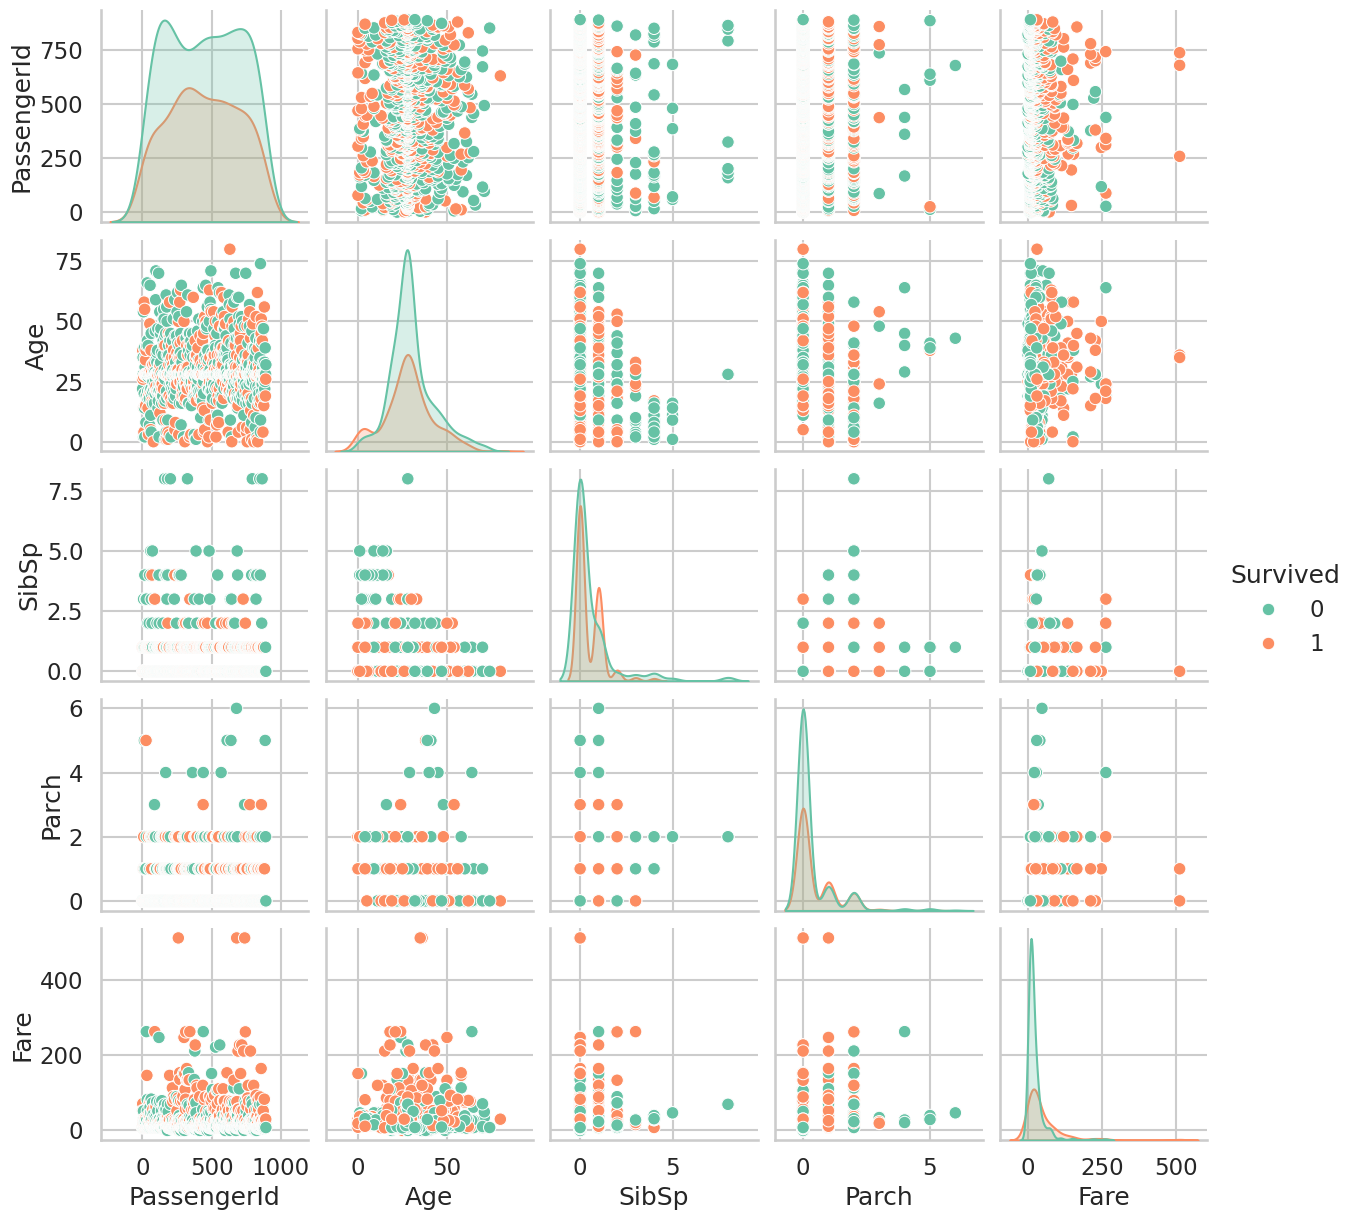

In [17]:
sns.pairplot(df, hue="Survived")
plt.show()

SURVIVAL COUNT

In [18]:
df["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [19]:
per_survived=df["Survived"].value_counts(normalize=True)*100
print(per_survived)

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


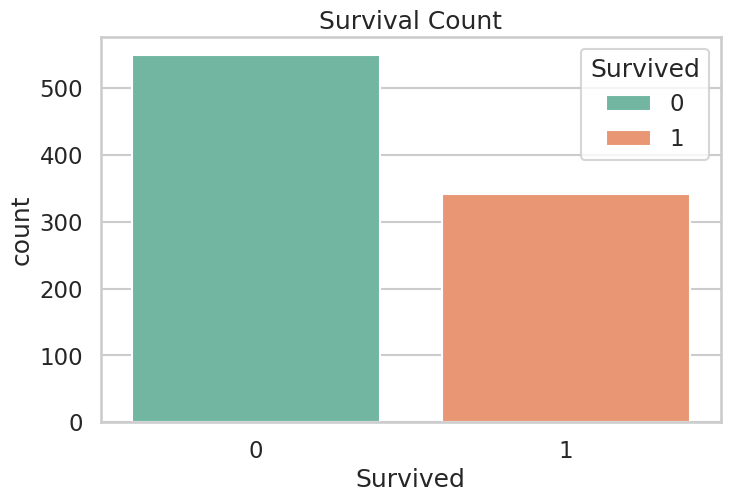

In [20]:
sns.countplot(x="Survived", hue="Survived",data=df)
plt.title("Survival Count")
plt.show()

Survival by Sex

In [21]:
df["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [22]:
per_sex=df["Sex"].value_counts(normalize=True)*100
print(per_sex)

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64


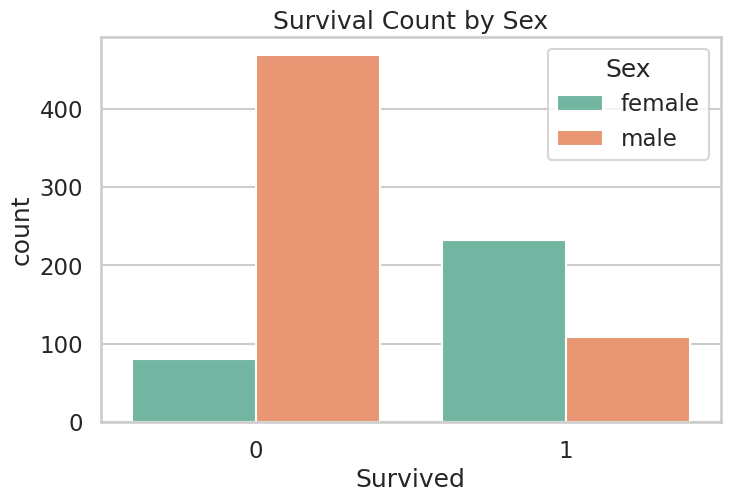

In [23]:
sns.countplot(x="Survived", data=df, hue="Sex",palette="Set2")  # bars split by Sex
plt.title("Survival Count by Sex")
plt.show()


Survival by class

In [24]:
df["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [25]:
per_pclass=df["Pclass"].value_counts(normalize=True)*100
print(per_pclass)

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64


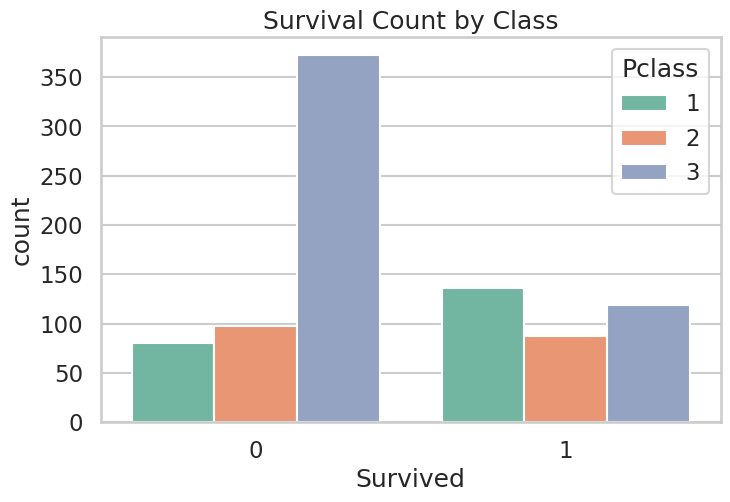

In [26]:
sns.countplot(x="Survived", data=df, hue="Pclass",palette="Set2")
plt.title("Survival Count by Class")
plt.show()

In [27]:
df["SibSp"].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [28]:
df["Parch"].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


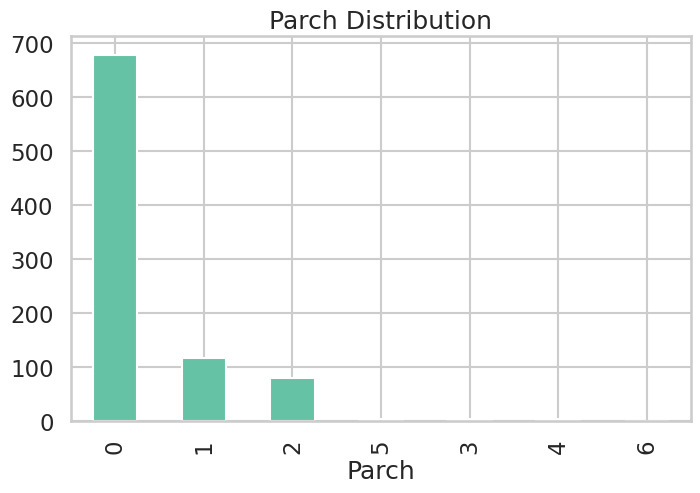

In [29]:
df['Parch'].value_counts().plot(kind='bar')
plt.title("Parch Distribution")
plt.show()

In [30]:
df["SibSp"].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


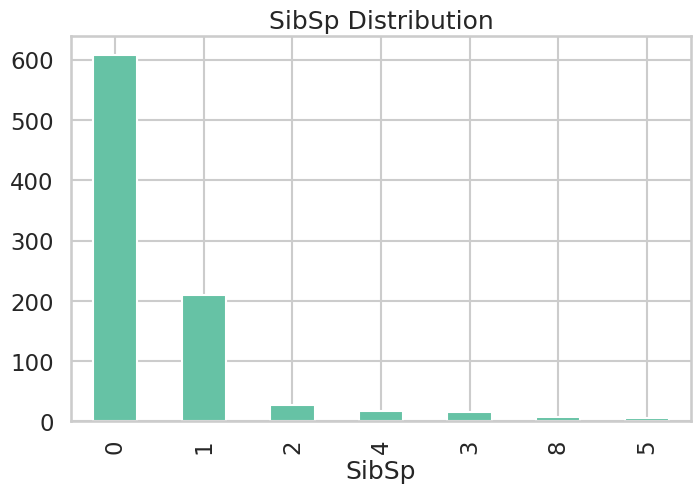

In [31]:
df["SibSp"].value_counts().plot(kind="bar")
plt.title("SibSp Distribution")
plt.show()

In [32]:
df["Embarked"].value_counts()

,count
Embarked,
S,646
C,168
Q,77


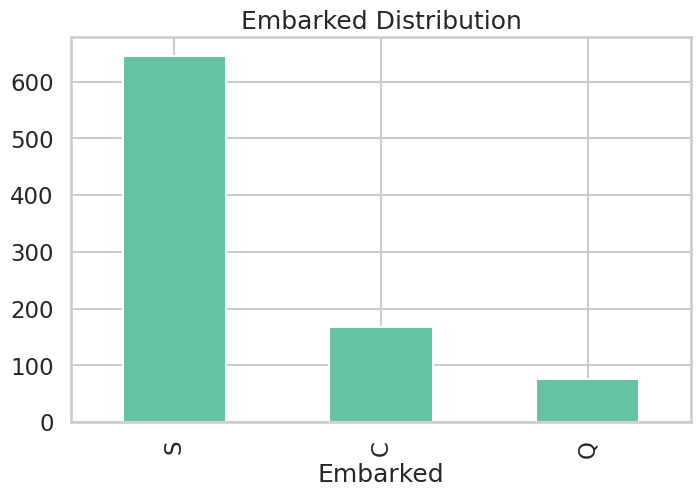

In [33]:
df["Embarked"].value_counts().plot(kind="bar")
plt.title("Embarked Distribution")
plt.show()

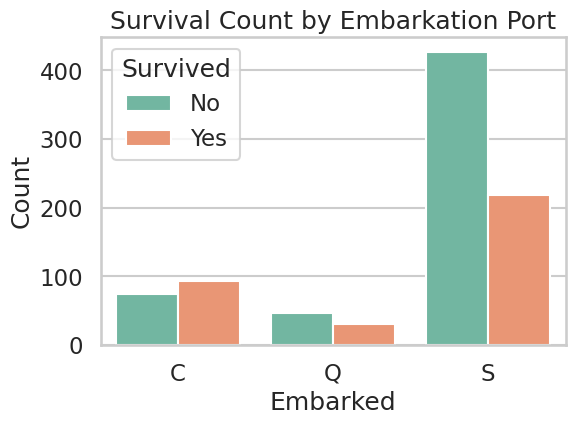

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Embarked", hue="Survived")
plt.title("Survival Count by Embarkation Port")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

age by survival

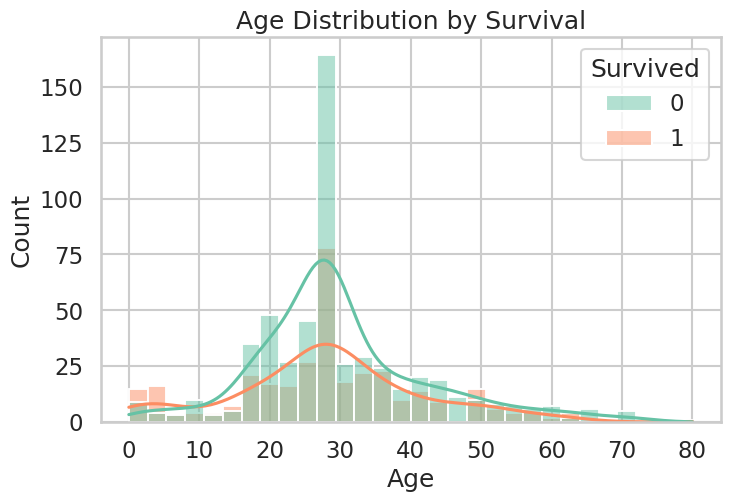

In [35]:
sns.histplot(data=df, x="Age", hue="Survived", kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()


In [36]:
age_skew=df["Age"].skew()
age_skew

np.float64(0.5035697085944845)

In [37]:
age_kurtosis=df["Age"].kurtosis()
age_kurtosis

np.float64(0.9983911091682365)

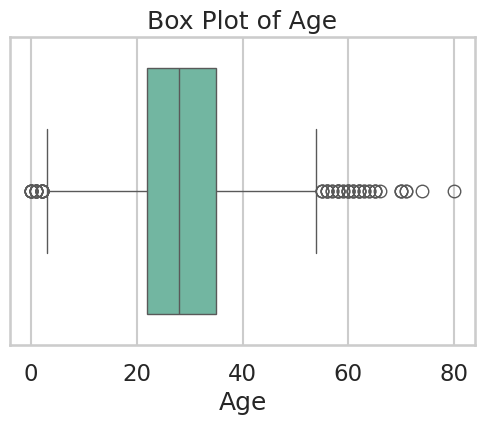

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Age"])
plt.title("Box Plot of Age")
plt.xlabel("Age")
plt.show()

fare

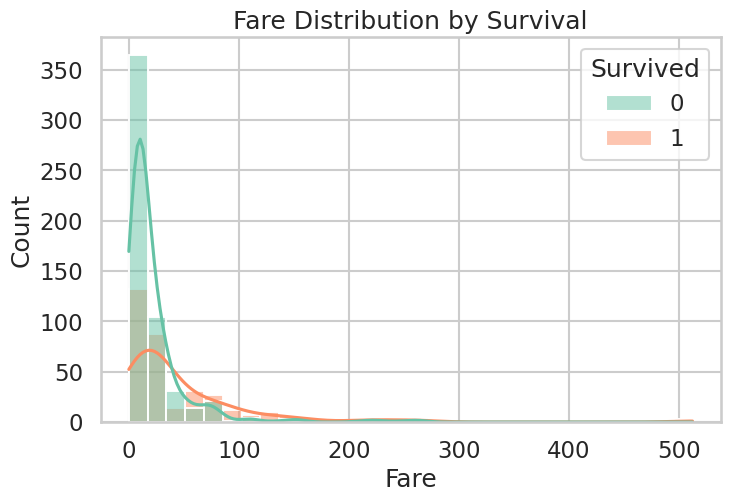

In [39]:
sns.histplot(data=df, x="Fare", hue="Survived", kde=True, bins=30)
plt.title("Fare Distribution by Survival")
plt.show()

In [40]:
print(df["Fare"].skew())

4.787316519674893


In [41]:
print(df["Fare"].kurtosis())

33.39814088089868


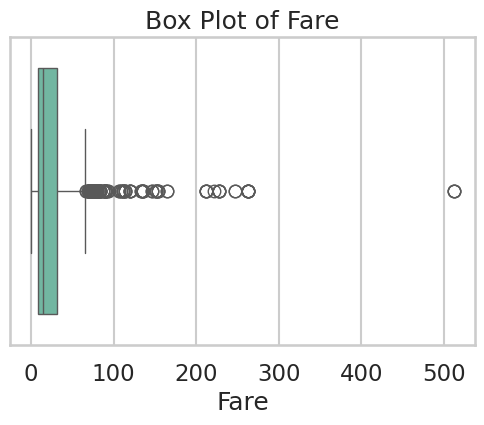

In [42]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Fare"])
plt.title("Box Plot of Fare")
plt.xlabel("Fare")
plt.show()


correlation

In [43]:
df.corr(numeric_only=True)

,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.034322,-0.057527,-0.001652,0.012658
Age,0.034322,1.000000,-0.233066,-0.172745,0.096838
SibSp,-0.057527,-0.233066,1.000000,0.414838,0.159651
Parch,-0.001652,-0.172745,0.414838,1.000000,0.216225
Fare,0.012658,0.096838,0.159651,0.216225,1.000000


summary stats

In [44]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.345679,0.523008,0.381594,32.204208
std,257.353842,13.028212,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


heatmap

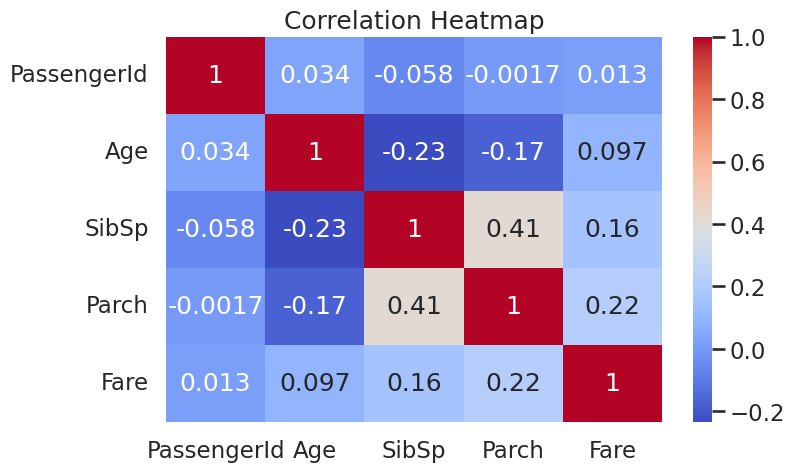

In [45]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# FEATURE ENGINEERING

Drop unused columns

In [46]:
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
df.drop(columns=drop_cols, inplace=True)

FamilySize=passenger +SibSp+Parch

In [47]:
# Create FamilySize column
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Bin into categories
def family_group(size):
    if size == 1:
        return "Alone"
    elif 2 <= size <= 4:
        return "Small"
    else:
        return "Large"

df["FamilyGroup"] = df["FamilySize"].apply(family_group)


In [48]:
df.drop(columns=["SibSp", "Parch","FamilySize"], inplace=True)

In [49]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyGroup
0,0,3,male,22,7.2500,S,Small
1,1,1,female,38,71.2833,C,Small
2,1,3,female,26,7.9250,S,Alone
3,1,1,female,35,53.1000,S,Small
4,0,3,male,35,8.0500,S,Alone


drop column used to create family


In [ ]:
df["FamilyGroup"].value_counts()

Family Size vs Survival

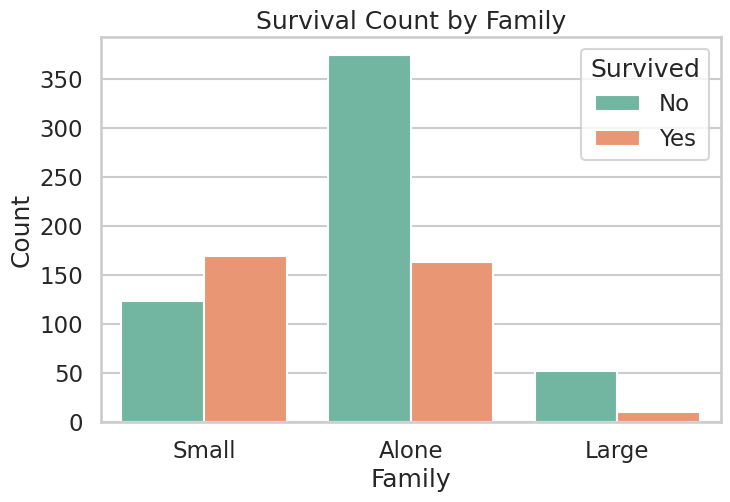

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="FamilyGroup", hue="Survived")
plt.title("Survival Count by Family")
plt.xlabel("Family")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

handling outliers

In [51]:
df.shape

(891, 7)

In [52]:
Q1=df["Age"].quantile(0.25)
Q3=df["Age"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df["Age"]>=lower_bound) & (df["Age"]<=upper_bound)]

In [53]:
df.shape

(825, 7)

# FEATURE AND TARGET COLUMN

In [54]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [55]:
X

,Pclass,Sex,Age,Fare,Embarked,FamilyGroup
0,3,male,22,7.2500,S,Small
1,1,female,38,71.2833,C,Small
2,3,female,26,7.9250,S,Alone
3,1,female,35,53.1000,S,Small
4,3,male,35,8.0500,S,Alone
...,...,...,...,...,...,...
886,2,male,27,13.0000,S,Alone
887,1,female,19,30.0000,S,Alone
888,3,female,28,23.4500,S,Small
889,1,male,26,30.0000,C,Alone


In [56]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


train test split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilyGroup'], dtype='object')

Preprocessing + Model Pipeline

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [60]:
num_features = ["Age", "Fare"]
cat_features = ["Pclass", "Sex", "Embarked","FamilyGroup"]

In [61]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(), cat_features)
    ]
)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# LOGISTIC REGRESSION

LG pipeline

In [63]:
LR_model=Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(random_state=42))
])

parameter grid for logistic regression

In [64]:
param_grid = {
    "classifier__penalty": ["l1", "l2", "elasticnet", None],   # regularization type
    "classifier__C": [0.01, 0.1, 1, 10, 100],                  # inverse of regularization strength
    "classifier__solver": ["liblinear", "saga", "lbfgs"],      # optimization algorithm
    "classifier__l1_ratio": [0, 0.5, 1]                        # only used if penalty="elasticnet"
}


grid search with cross validation

In [65]:
# Grid search with CV
LR_grid_search = GridSearchCV(
    LR_model,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=2
)


fit grid search cv

In [66]:
LR_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked',
                                                                          'FamilyGroup'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__l1_ratio': [0, 0.5, 1],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None],
                         'classifier__solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='f1', verbose=2)

best parameter

In [67]:
print("Best Parameters:", LR_grid_search.best_params_)


Best Parameters: {'classifier__C': 0.1, 'classifier__l1_ratio': 0, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


extract best estimator

In [68]:
best_lr = LR_grid_search.best_estimator_


In [69]:

LR_pred=best_lr.predict(X_test)

#DECISION TREE

DT Pipeline

In [70]:
DT_model=Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

parameter grid for decision tree

In [71]:
param_grid = {
    "classifier__criterion": ["gini", "entropy", "log_loss"],  # split quality
    "classifier__max_depth": [None, 3, 5, 10, 20],            # tree depth
    "classifier__min_samples_split": [2, 5, 10],              # min samples to split a node
    "classifier__min_samples_leaf": [1, 2, 4],                # min samples at leaf
    "classifier__max_features": [None, "sqrt", "log2"]        # number of features at split
}

gridsearch with cv

In [72]:
DT_grid_search = GridSearchCV(
    DT_model,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,      # all cores
    verbose=2       # show progress
)

fit the grid search

In [73]:
DT_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked',
                                                                          'FamilyGroup'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [None, 3, 5, 10, 20],
                         'classifier__max_features': [None, 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=2)

best parameter

In [74]:
print(DT_grid_search.best_params_)

{'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}


extract best estimator(model)

In [75]:
best_DT= DT_grid_search.best_estimator_


prediction

In [76]:
DT_pred=best_DT.predict(X_test)

# RANDOM FOREST

RF pipeline

In [77]:
RF_model=Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

parameter grid for Random forest

In [78]:
param_grid = {
    "classifier__n_estimators": [100, 200],   # number of trees
    "classifier__max_depth": [None, 5, 10, None],    # depth of each tree
    "classifier__min_samples_split": [2, 5],   # min samples to split a node
    "classifier__min_samples_leaf": [1,2],     # min samples at leaf node
    "classifier__max_features": ["sqrt", "log2"]   # features considered per split
}

grid search with cross validation

In [79]:
RF_grid_search = GridSearchCV(
    RF_model,
    param_grid,
    cv=5,
    scoring="f1",   # optimize for F1 (good for imbalanced classes)
    n_jobs=-1,
    verbose=1
)


fit grid search

In [80]:
RF_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked',
                                                                          'FamilyGroup'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 5, 10, None],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1', verbose=1)

best parameter

In [81]:
print("Best Parameters:", RF_grid_search.best_params_)


Best Parameters: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


Extract best model


In [82]:
best_rf = RF_grid_search.best_estimator_


Predictions on test set


In [83]:
RF_pred = best_rf.predict(X_test)


# GRADIENT BOOSTING

GB Pipeline

In [84]:
GD_model=Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

parameter grid for gradient boosting

In [85]:
param_grid = {
    "classifier__n_estimators": [100, 200],   # number of boosting stages (trees)
    "classifier__learning_rate": [0.05, 0.1], # step size shrinkage
    "classifier__max_depth": [3, 5, 7],            # depth of individual trees
    "classifier__subsample": [0.8, 1.0],           # fraction of samples for each tree
    "classifier__min_samples_split": [2, 5]    # min samples to split a node
}


Grid search with cross-validation


In [86]:
GD_grid_search = GridSearchCV(
    GD_model,
    param_grid,
    cv=5,
    scoring="f1",   # optimize F1 score
    n_jobs=-1,
    verbose=1
)

fit grid search

In [87]:
GD_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked',
                                                                          'FamilyGroup'])])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

best parameter

In [88]:
print("Best Parameters:", GD_grid_search.best_params_)


Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}


Extract best model


In [89]:
best_gd = GD_grid_search.best_estimator_


predictions

In [90]:
GD_pred = best_gd.predict(X_test)


#XGBoost (Extreme Gradient Boosting)

In [91]:
from xgboost import XGBClassifier

XGB Pipeline

In [92]:
XGB_model=Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(random_state=42))
])

parameter grid

In [93]:
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [3, 5],
    "classifier__learning_rate": [ 0.05, 0.1],
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0]
}

grid search with cross validation

In [94]:

# Grid search with cross-validation
XGB_grid_search = GridSearchCV(
    XGB_model,
    param_grid,
    cv=5,
    scoring="f1",   # optimize for F1 (since Titanic is imbalanced)
    n_jobs=-1,
    verbose=1
)


fir grid search

In [95]:
XGB_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked',
                                                                          'FamilyGroup'])])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=Non...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 1.0],
                         'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 5],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

best parameters

In [96]:
print("Best Parameters:", XGB_grid_search.best_params_)

Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}


Extract best model


In [97]:
best_xgb = XGB_grid_search.best_estimator_


predictions

In [98]:
XGB_pred = best_xgb.predict(X_test)


# LightGBM (Light Gradient Boosting Machine)

In [99]:
from lightgbm import LGBMClassifier

LGBM pipeline

In [100]:
LGBM_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LGBMClassifier(
        random_state=42,
        n_estimators=20 ))# start with moderate trees
])

parameter grid for light GBM

In [101]:
param_grid = {
    "classifier__learning_rate": [0.01, 0.05, 0.1],  # step shrinkage
    "classifier__num_leaves": [31, 50],              # complexity of trees
    "classifier__max_depth": [-1, 7, 15],            # -1 means no limit
    "classifier__subsample": [0.8, 1.0],             # row sampling
    "classifier__colsample_bytree": [0.8, 1.0]       # feature sampling
}


Grid search with cross-validation

In [102]:
LGBM_grid_search = GridSearchCV(
    LGBM_model,
    param_grid,
    cv=5,
    scoring="f1",   # Titanic is imbalanced, F1 works well
    n_jobs=-1
)


Fit grid search

In [103]:
LGBM_grid_search.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 248, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 660, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375758 -> initscore=-0.507595
[LightGBM] [Info] Start training from score -0.507595
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked',
                                                                          'FamilyGroup'])])),
                                       ('classifier',
                                        LGBMClassifier(n_estimators=20,
                                                       random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 1.0],
                         'classifier__learning_rate': [0.01, 0.05, 0.1],
                         'classifier__max_depth': [-1, 7, 15],
                         'classifier__num_leaves': [31, 50],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='f1')

Best parameters

In [104]:
print("Best Parameters:", LGBM_grid_search.best_params_)

Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__num_leaves': 31, 'classifier__subsample': 0.8}


Extract best model


In [105]:
best_lgbm = LGBM_grid_search.best_estimator_


prediction

In [106]:
LGBM_pred = best_lgbm.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


XGBoost → safer choice if dataset is small to medium and you want stable performance.

LightGBM → best for large datasets with millions of rows, or if training speed is critical.

#SVC SUPPORT VECTOR CLASSIFICATION

scv pipeline

In [107]:
from sklearn.svm import SVC
SVC_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", SVC())
])

paramtergrid

In [108]:
param_grid = {
    "classifier__kernel": ["linear", "rbf", "poly", "sigmoid"],
    "classifier__C": [0.1, 1, 10, 100],
    "classifier__gamma": ["scale", "auto", 0.01, 0.1, 1]
}


GridsearchCV setup

In [109]:
SVC_grid_search = GridSearchCV(
    SVC_model,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)


fit grid search

In [110]:
SVC_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked',
                                                                          'FamilyGroup'])])),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'classifier__kernel': ['linear', 'rbf', 'poly',
                                                'sigmoid']},
             scoring='f1')

best parameter

In [111]:
print("Best Parameters:", SVC_grid_search.best_params_)


Best Parameters: {'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}


get model parameters

In [112]:
best_svc = SVC_grid_search.best_estimator_
best_svc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'FamilyGroup'])])),
                ('classifier', SVC(C=1, gamma=0.1))])

prediction

In [113]:

SVC_pred=best_svc.predict(X_test)

# KNN

KNN PIPELINE

In [114]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])


Parameter grid for tuning


In [115]:
param_grid = {
    "classifier__n_neighbors": [3, 5, 7, 9, 11, 15],  # number of neighbors
    "classifier__weights": ["uniform", "distance"],   # how neighbors are weighted
    "classifier__p": [1, 2]   # 1 = Manhattan distance, 2 = Euclidean
}

Grid search with cross-validation


In [116]:
KNN_grid_search = GridSearchCV(
    KNN_model,
    param_grid,
    cv=5,
    scoring="f1",   # since Titanic is imbalanced
    n_jobs=-1)

Fit grid search


In [117]:

KNN_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked',
                                                                          'FamilyGroup'])])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__n_neighbors': [3, 5, 7, 9, 11, 15],
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1')

Best parameters

In [118]:
print("Best Parameters:", KNN_grid_search.best_params_)


Best Parameters: {'classifier__n_neighbors': 11, 'classifier__p': 1, 'classifier__weights': 'uniform'}


Extract best KNN model


In [119]:
best_knn = KNN_grid_search.best_estimator_


prediction

In [120]:
KNN_pred=best_knn.predict(X_test)

#EVALUATION

In [121]:
predictions = {
    "Logistic Regression": LR_pred,
    "Decision Tree": DT_pred,
    "Random Forest": RF_pred,
    "Gradient Boosting": GD_pred,
    "XGBoost": XGB_pred,
    "LightGBM": LGBM_pred,
    "SVC": SVC_pred,
    "KNN": KNN_pred
}

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = []

for name, y_pred in predictions.items():
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    metrics.append([name, acc, prec, rec, f1])

metrics_df = pd.DataFrame(metrics, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.818182   0.800000  0.727273  0.761905
1        Decision Tree  0.842424   0.857143  0.727273  0.786885
2        Random Forest  0.842424   0.844828  0.742424  0.790323
3    Gradient Boosting  0.854545   0.850000  0.772727  0.809524
4              XGBoost  0.842424   0.844828  0.742424  0.790323
5             LightGBM  0.824242   0.849057  0.681818  0.756303
6                  SVC  0.812121   0.796610  0.712121  0.752000
7                  KNN  0.800000   0.789474  0.681818  0.731707


<Figure size 1200x600 with 0 Axes>

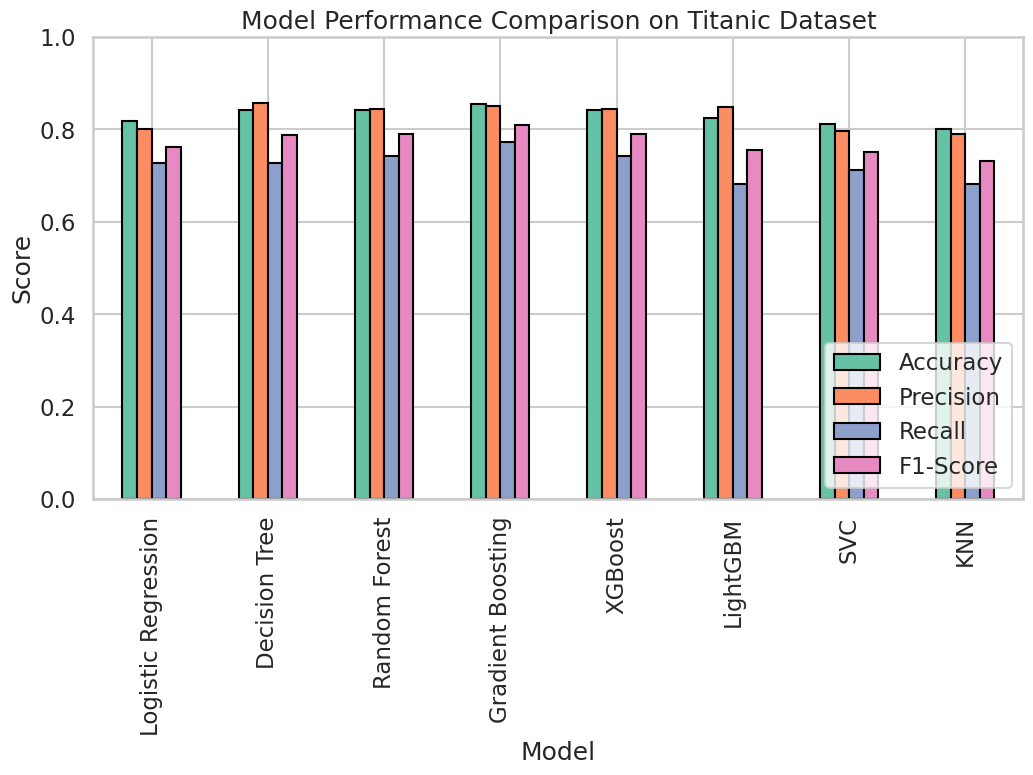

In [123]:
plt.figure(figsize=(12,6))
metrics_df.set_index("Model")[["Accuracy","Precision","Recall","F1-Score"]].plot(
    kind="bar", figsize=(12,6), edgecolor="black"
)
plt.title("Model Performance Comparison on Titanic Dataset")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation="vertical")
plt.legend(loc="lower right")
plt.show()


confusion matrix to show TP,TN,FP,FN

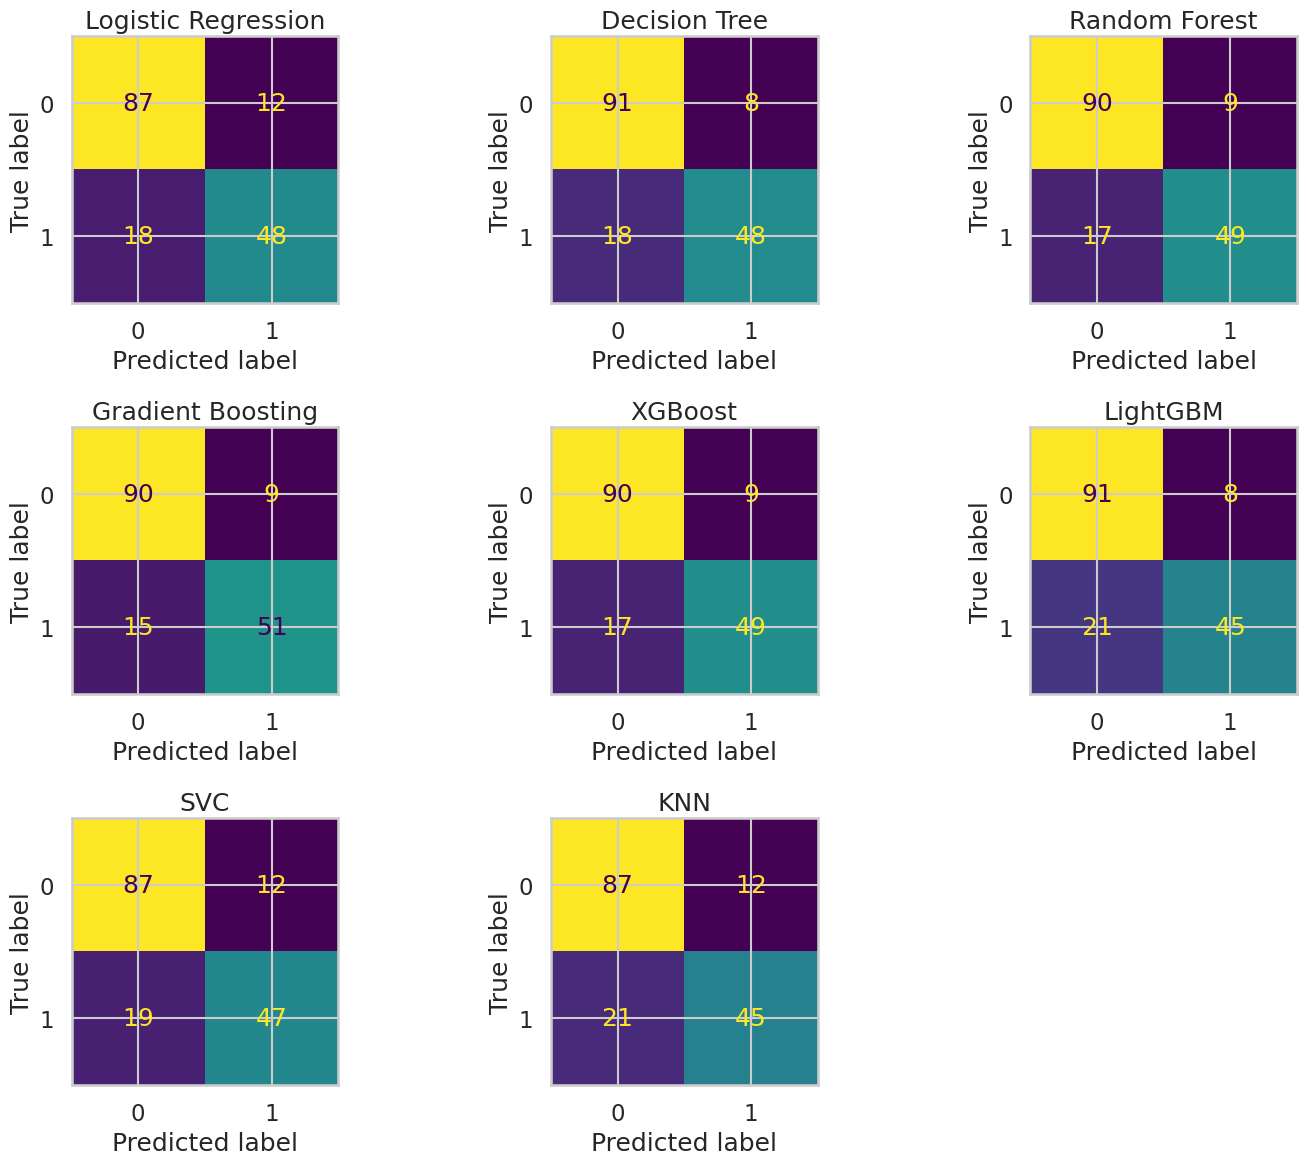

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dictionary of model predictions
models = {
    "Logistic Regression": LR_pred,
    "Decision Tree": DT_pred,
    "Random Forest": RF_pred,
    "Gradient Boosting": GD_pred,
    "XGBoost": XGB_pred,
    "LightGBM": LGBM_pred,
    "SVC": SVC_pred,
    "KNN": KNN_pred
}

# Create subplot grid (3 rows x 3 cols for 8 models)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, (name, preds) in enumerate(models.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=axes[i], colorbar=False)
    axes[i].set_title(name)

# Hide unused subplot (since we have 8 models, not 9)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#`📊 Model Performance Summary`

| Model               | Accuracy  | Precision | Recall    | F1-Score  |
| ------------------- | --------- | --------- | --------- | --------- |
| Logistic Regression | 0.818     | 0.800     | 0.727     | 0.762     |
| Decision Tree       | 0.842     | 0.857     | 0.727     | 0.787     |
| Random Forest       | 0.842     | 0.845     | 0.742     | 0.790     |
| Gradient Boosting   | **0.855** | 0.850     | **0.773** | **0.810** |
| XGBoost             | 0.842     | 0.845     | 0.742     | 0.790     |
| LightGBM            | 0.824     | **0.849** | 0.682     | 0.756     |
| SVC                 | 0.812     | 0.797     | 0.712     | 0.752     |
| KNN                 | 0.800     | 0.789     | 0.682     | 0.732     |


# `🧐 Interpretation`

Best Overall Model → Gradient Boosting

Highest Accuracy (85.5%) and F1-Score (0.81).

Best trade-off between Precision and Recall.

Decision Tree & Random Forest & XGBoost

Similar performance (~84% accuracy, F1 around 0.79).

Good balance, but slightly below Gradient Boosting.

Logistic Regression

Surprisingly strong baseline (81.8% accuracy, F1 = 0.76).

Performs well given its simplicity.

LightGBM

High precision (0.85) but lower recall (0.68), meaning it misses more positive cases.

SVC

Moderate performance (Accuracy 81%, F1 = 0.75).

Performs worse than ensemble models.

KNN

Weakest performer overall (Accuracy 80%, F1 = 0.73).

Struggles compared to tree-based models.

#`✅ Conclusion`

* Gradient Boosting is the best-performing model for this Titanic dataset, achieving the highest accuracy and F1-score.

* Tree-based ensemble methods (Random Forest, XGBoost, LightGBM) also perform well and are competitive alternatives.

* Logistic Regression is a strong, simple baseline model and could be useful if interpretability is a priority.

* KNN and SVC underperform compared to boosting/ensemble methods and may not be the best choices here.

#SAVING MODEL

In [150]:
import pickle


Save (Dump) a Model

In [151]:
# Save model to a file
with open("GB_model.pkl", "wb") as f:
    pickle.dump(best_gd, f)


Load (Restore) the Model

In [152]:
# Load model from file
with open("GB_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


load titanic test csv

In [153]:
test=pd.read_csv("/content/test.csv")

In [154]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Create family-related features

Make Predictions with Loaded Model

In [155]:
# Create FamilySize column in test data
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

# Apply the same family_group function to the test data
test["FamilyGroup"] = test["FamilySize"].apply(family_group)

# Drop the original columns from test data
test.drop(columns=["SibSp", "Parch", "FamilySize"], inplace=True)

In [156]:
test = test.copy()
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

In [157]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
Ticket,0
Fare,0
Cabin,327
Embarked,0
FamilyGroup,0


In [158]:
# Drop the original columns from test data that were dropped from train data
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
test_processed = test.drop(columns=drop_cols)



In [159]:
test_predictions = best_gd.predict(test_processed)

# submission file

In [160]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],       # original passenger IDs
    "Survived": test_predictions              # predictions from your model
})


In [161]:
submission.to_csv("submission.csv", index=False)


In [162]:
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
